# PERSONALITY SYSTEM using PYTHON

In [ ]:
# lib's

import numpy as np
import pandas as pd

# clustering lib
from sklearn.cluster import MiniBatchKMeans

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'dataset\\data-final.csv', delimiter='\t')
df

In [ ]:
columns = df.columns
columns

In [ ]:
for c in columns:
    print(c)

In [ ]:
X = df[df.columns[0:50]]
X

In [ ]:
X.info()

In [ ]:
# No nan value : for safety purposes fill nan with 0

X = X.fillna(0)

In [ ]:
# MiniBatchKMeans clustering -- in unsupervised learning algorithms

kmeans = MiniBatchKMeans(n_clusters=10, random_state=0, batch_size=100, max_iter=100).fit(X)

# n_clusters : number of personality type (in our case its 10 -- you can change it with any number of cluster)
# random_state : change as you want
# batch_size : the amount of data that is going to train at once or one at a time (feed the data in batches)
# max_iter : train the data at n times (in our case its 100 times)

In [ ]:
# to check the number of cluster after model train

len(kmeans.cluster_centers_)

In [ ]:
# to find personality types -- most common answer of each type or common answer pattern

one = kmeans.cluster_centers_[0]
two = kmeans.cluster_centers_[1]
three =kmeans.cluster_centers_[2]
four = kmeans.cluster_centers_[3]
five =kmeans.cluster_centers_[4]
six = kmeans.cluster_centers_[5]
seven = kmeans.cluster_centers_[6]
eight = kmeans.cluster_centers_[7]
nine= kmeans.cluster_centers_[8]
ten = kmeans.cluster_centers_[9]

In [ ]:
one

In [ ]:
len(one)

In [ ]:
# to find score of personality types one

one_scores = {}

one_scores['extroversion_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] - one[9]
one_scores['neuroticism_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] + one[5] + one[6] + one[7] + one[8] + one[9]
one_scores['agreeableness_score'] =  -one[0] + one[1] - one[2] + one[3] - one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['conscientiousness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['openness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] + one[7] + one[8] + one[9]

In [ ]:
one_scores

In [ ]:
all_types = {'one':one, 'two': two, 'three' :three, 'four':four, 'five':five, 'six': six, 'seven': seven, 'eight': eight,
             'nine': nine, 'ten': ten}

all_types_scores ={}

for name, personality_type in all_types.items():
    personality_trait = {}

    personality_trait['extroversion_score'] =  personality_type[0] - personality_type[1] +personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] - personality_type[7] + personality_type[8] -personality_type[9]
    personality_trait['neuroticism_score'] =  personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['agreeableness_score'] =  -personality_type[0] +personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] +personality_type[4] - personality_type[5] +personality_type[6] -personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['openness_score'] =  personality_type[0] -personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    
    all_types_scores[name] = personality_trait

In [ ]:
all_types_scores

In [ ]:
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])
    
    

In [ ]:
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))

In [ ]:
all_extroversion_normalized

In [ ]:
len(all_extroversion_normalized)

In [ ]:
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]
    
    normalized_all_types_scores[personality_type] = normalized_personality_trait
    
    counter+=1

In [ ]:
normalized_all_types_scores

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['one'].keys()), normalized_all_types_scores['one'].values(), color='g')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['two'].keys()), normalized_all_types_scores['two'].values(), color='g')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['three'].keys()), normalized_all_types_scores['three'].values(), color='g')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['four'].keys()), normalized_all_types_scores['four'].values(), color='g')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['five'].keys()), normalized_all_types_scores['five'].values(), color='g')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['six'].keys()), normalized_all_types_scores['six'].values(), color='g')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['seven'].keys()), normalized_all_types_scores['seven'].values(), color='g')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['eight'].keys()), normalized_all_types_scores['eight'].values(), color='g')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['nine'].keys()), normalized_all_types_scores['nine'].values(), color='g')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['ten'].keys()), normalized_all_types_scores['ten'].values(), color='g')
plt.show()

# Personality Clusters

Five Personality Traits (OCEAN)

- Openness to experience (inventive/curious vs. consistent/cautious)
- Conscientiousness (efficient/organized vs. easy-going/careless)
- Extroversion (outgoing/energetic vs. solitary/reserved)
- Agreeableness (friendly/compassionate vs. challenging/detached)
- Neuroticism (sensitive/nervous vs. secure/confident)

Resources: 
- [wikipedia](https://en.wikipedia.org/wiki/Big_Five_personality_traits)
- [ipip.ori.org](https://ipip.ori.org/newBigFive5broadKey.htm)
- [How Accurately Can You Describe Yourself?](https://ipip.ori.org/new_ipip-50-item-scale.htm)

In [1]:
# libs

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r'dataset\\data-final.csv', delimiter='\t')
df = df[df.columns[0:50]]
df.head()
# df = df.fillna(0)

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN1  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   5.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   1.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   5.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   4.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   5.0   

   OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0   1.0   4.0   1.0   4.0   1.0   5.0   3.0   4.0    5.0  
1   2.0   4.0   2.0   3.0   1.0   4.0   2.0   5.0    3.0  
2   1.0   2.0   1.0   4.0   2.0   5.0   3.0   4.0    4.0  
3   2.0   5.0   2.0   3.0   1.0   4.0   4.0   3.0    3.0  
4   1.0   5.0   1.0   5.0   1.0   5.0   3.0   5.0    5.0  

[5 rows x 50 columns]

In [3]:
df.shape

(1015341, 50)

In [4]:
# make copy of dataset
data = df.copy()

In [5]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum(),'\n')
# data.dropna(inplace=True)
data = data.fillna(0)
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum(),'\n')

print('Number of participants after eliminating missing values with 0: ', len(data))

Is there any missing value?  True
How many missing values?  89150 

Is there any missing value?  False
How many missing values?  0 

Number of participants after eliminating missing values with 0:  1015341


In [6]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [7]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


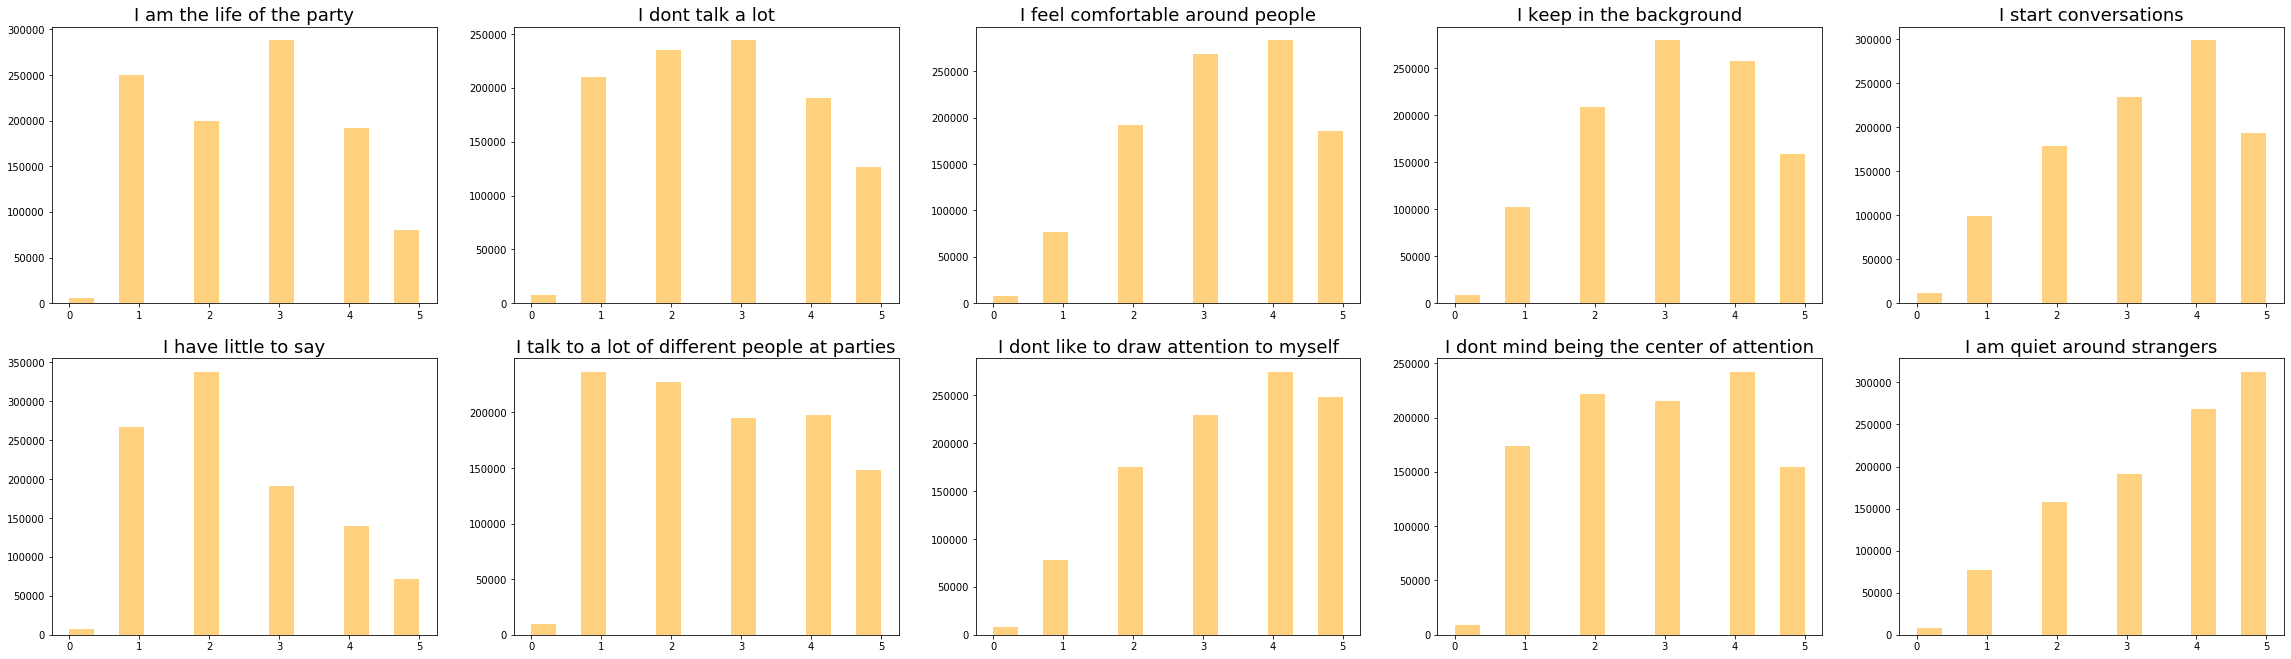

In [8]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


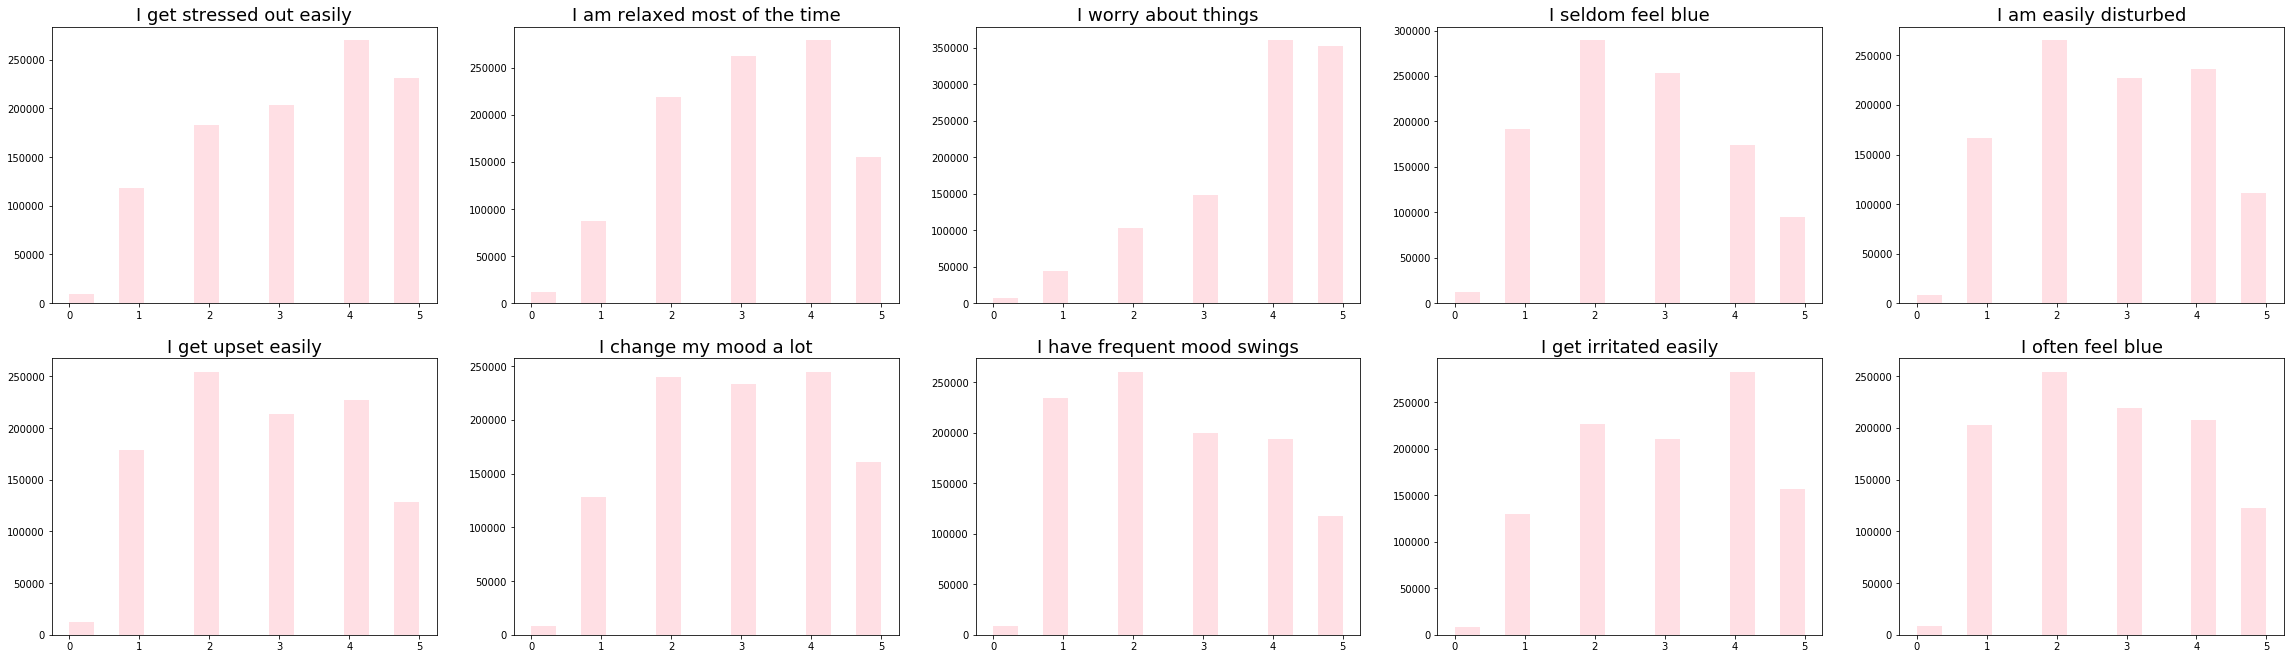

In [9]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


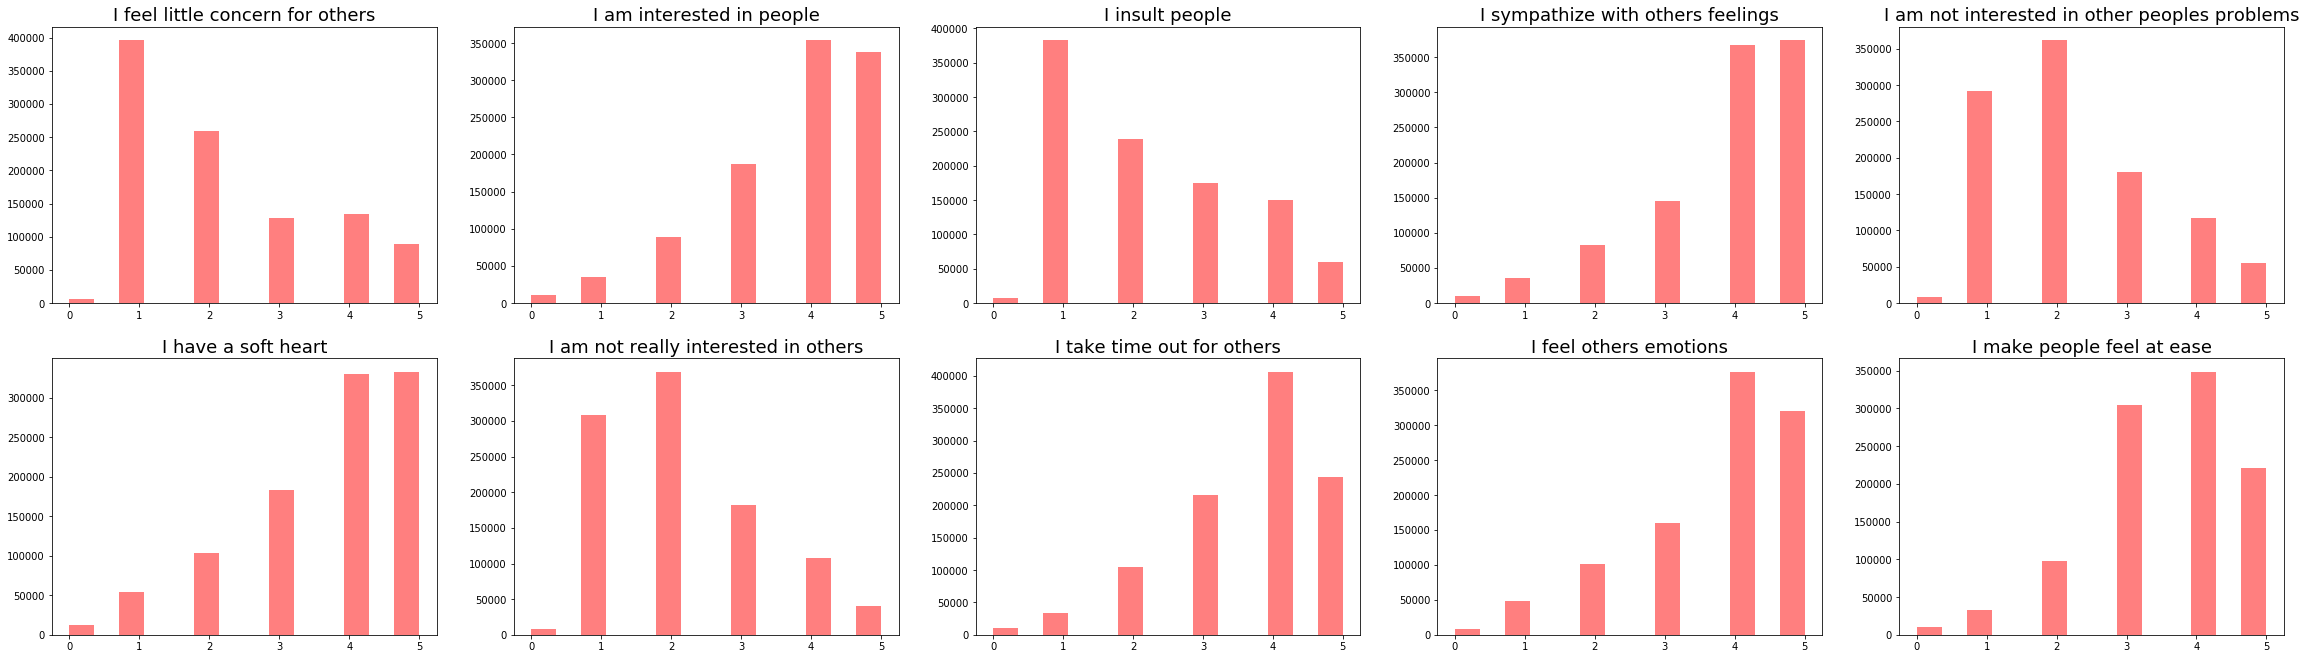

In [10]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


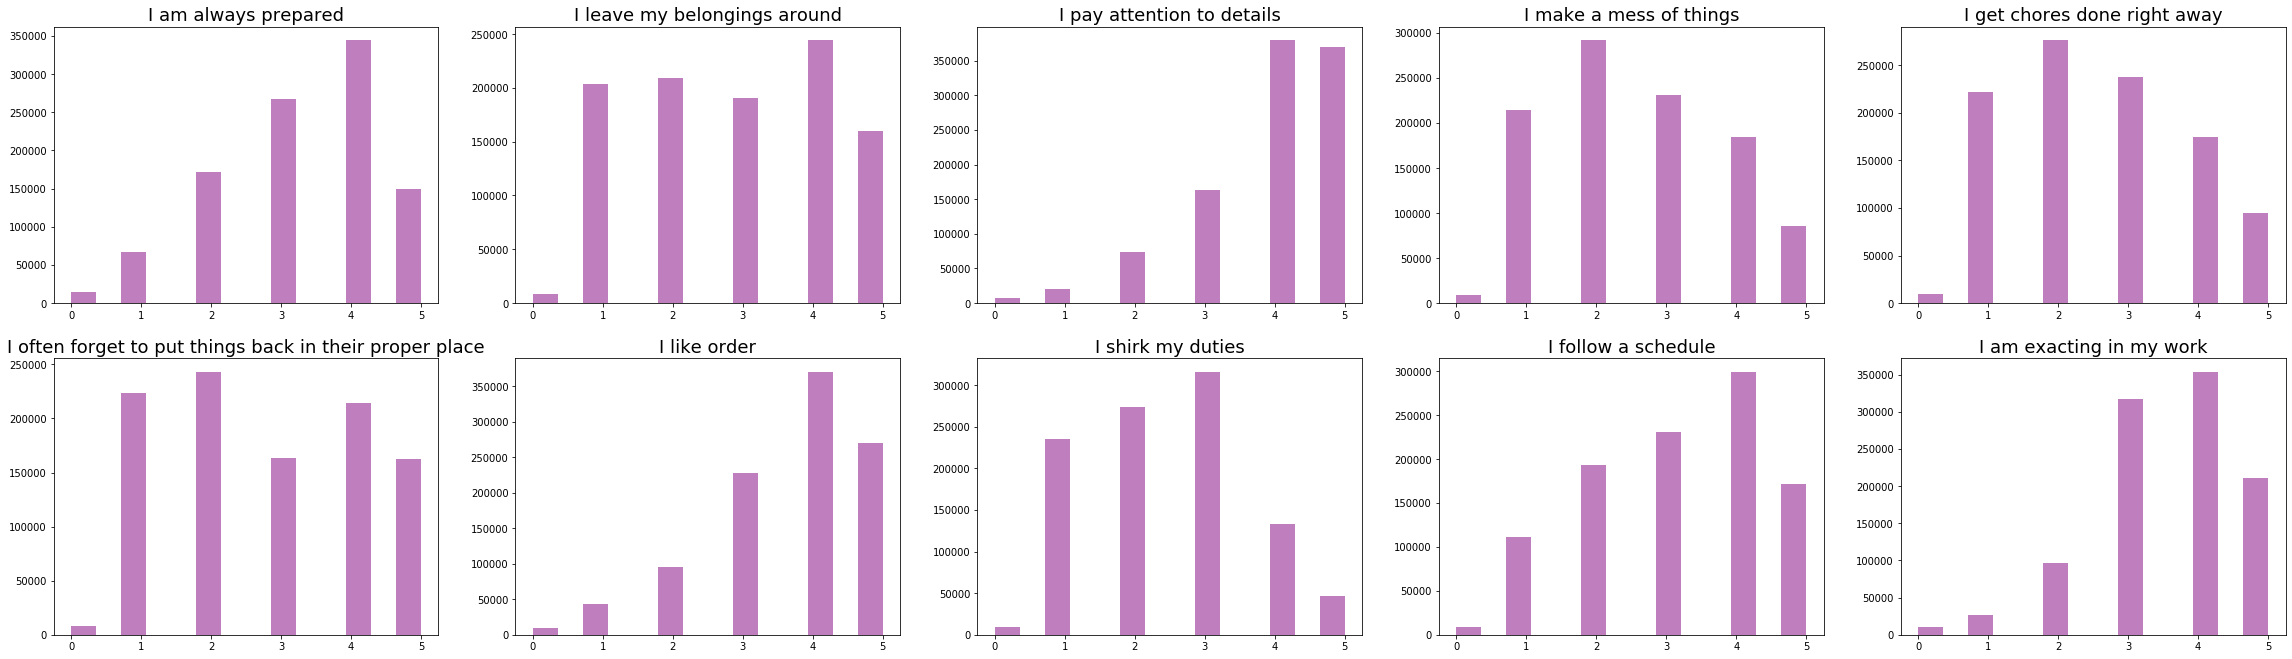

In [11]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


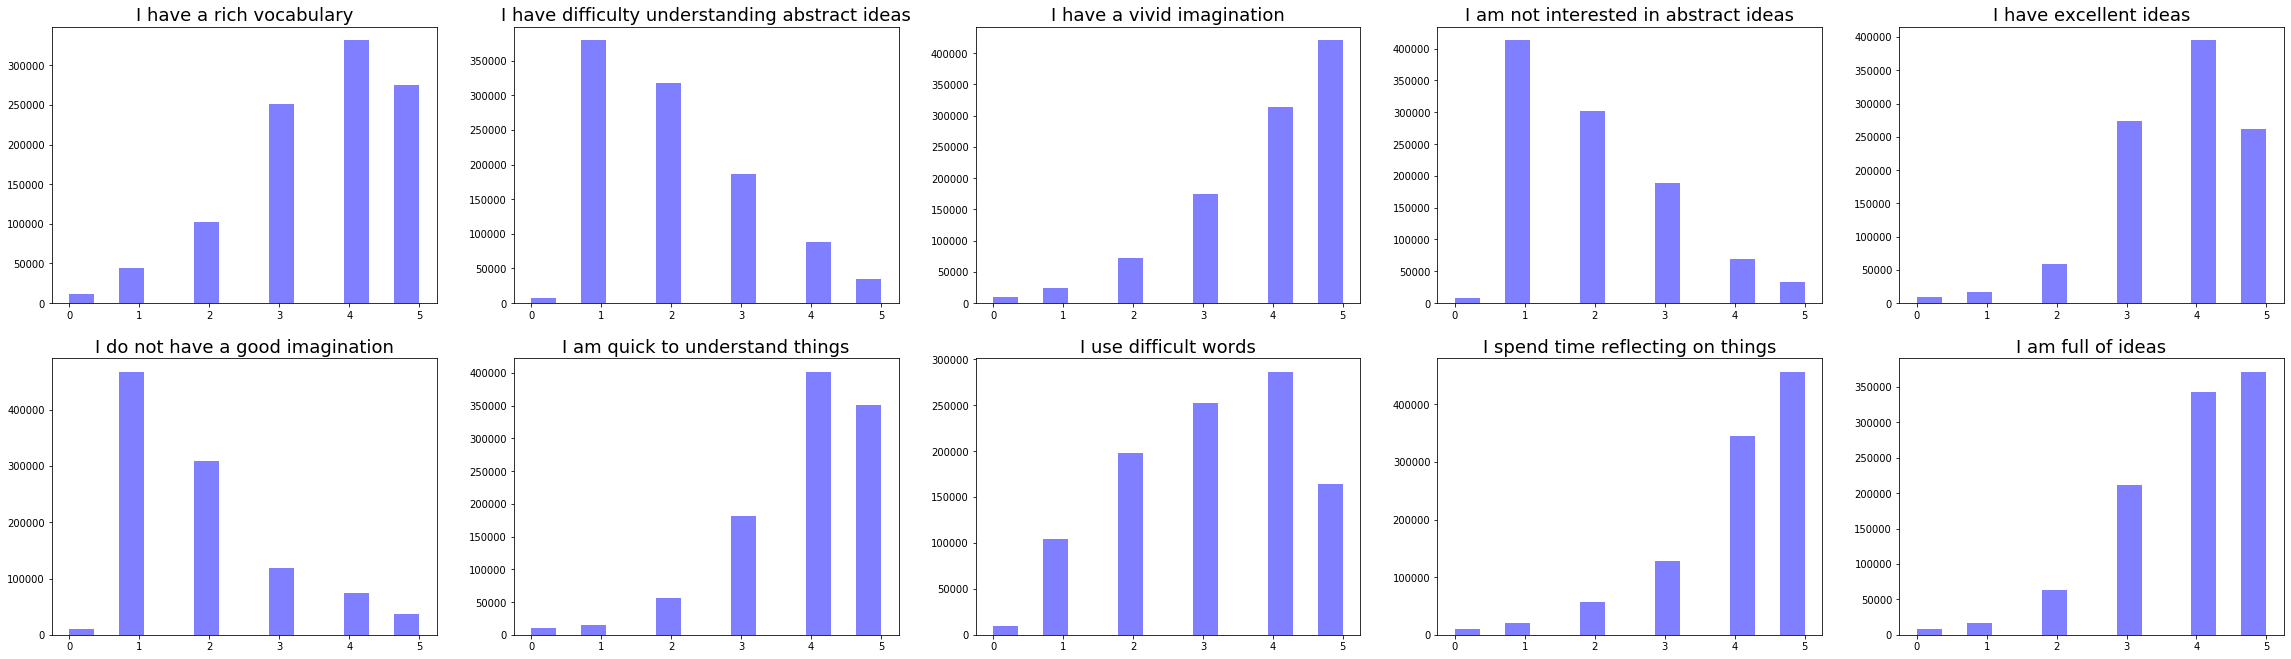

In [12]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

In [13]:
# to find number of clusters

# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

columns = list(data.columns)

scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=columns)
df_sample = data[:10000]

In [14]:
# !pip install yellowbrick

c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


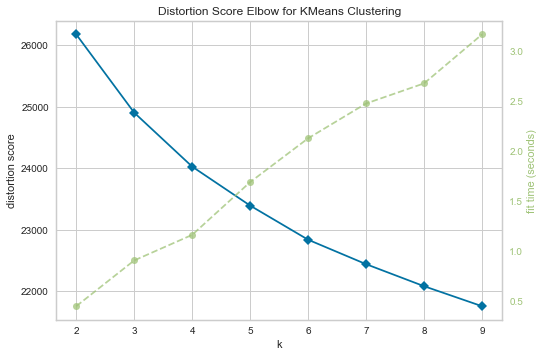

In [15]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df_sample)
visualizer.poof()

5 clusters looks optimum for the data set and we already know this researh is to identify 5 different personalities.

In [16]:
# to make 5 Personality Groups

# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I define 5 clusters and fit my model
k_fit = KMeans(n_clusters=5).fit(data)


In [17]:
k_fit

KMeans(n_clusters=5)

In [18]:
predictions = k_fit.labels_
data['Clusters'] = predictions
data.head()

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN2  \
0   0.8   0.2   1.0   0.4   1.0   0.2   1.0   0.4   0.8    0.2  ...   0.2   
1   0.6   1.0   0.6   0.8   0.6   0.6   0.4   1.0   0.2    1.0  ...   0.4   
2   0.4   0.6   0.8   0.8   0.6   0.4   0.2   0.6   0.4    1.0  ...   0.2   
3   0.4   0.4   0.4   0.6   0.8   0.4   0.4   0.8   0.2    0.8  ...   0.4   
4   0.6   0.6   0.6   0.6   1.0   0.6   0.6   1.0   0.6    0.8  ...   0.2   

   OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  Clusters  
0   0.8   0.2   0.8   0.2   1.0   0.6   0.8    1.0         3  
1   0.8   0.4   0.6   0.2   0.8   0.4   1.0    0.6         0  
2   0.4   0.2   0.8   0.4   1.0   0.6   0.8    0.8         0  
3   1.0   0.4   0.6   0.2   0.8   0.8   0.6    0.6         0  
4   1.0   0.2   1.0   0.2   1.0   0.6   1.0    1.0         3  

[5 rows x 51 columns]

In [19]:
predictions = k_fit.labels_
df['Clusters'] = predictions
df.head()

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   1.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   2.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   1.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   2.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   1.0   

   OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  Clusters  
0   4.0   1.0   4.0   1.0   5.0   3.0   4.0    5.0         3  
1   4.0   2.0   3.0   1.0   4.0   2.0   5.0    3.0         0  
2   2.0   1.0   4.0   2.0   5.0   3.0   4.0    4.0         0  
3   5.0   2.0   3.0   1.0   4.0   4.0   3.0    3.0         0  
4   5.0   1.0   5.0   1.0   5.0   3.0   5.0    5.0         3  

[5 rows x 51 columns]

In [20]:
# Analysing the Model

df.Clusters.value_counts()

2    264285
3    260139
1    246989
0    237455
4      6473
Name: Clusters, dtype: int64

In [21]:
df.groupby('Clusters').mean()

EXT1      EXT2      EXT3      EXT4      EXT5      EXT6  \
Clusters                                                               
0         2.078343  3.521952  2.833198  3.664846  2.589160  2.951031   
1         3.456587  1.918389  3.804542  2.486613  4.037131  1.832422   
2         1.850446  3.545827  2.384055  4.002210  2.429551  3.067106   
3         3.237904  2.150750  4.178839  2.455295  4.096395  1.801737   
4         1.144350  0.849467  0.713433  0.497015  0.368230  0.221109   

              EXT7      EXT8      EXT9     EXT10  ...      OPN1      OPN2  \
Clusters                                          ...                       
0         2.046148  3.828321  2.516136  4.078722  ...  3.582843  2.063928   
1         3.652159  2.750900  3.773864  2.976497  ...  3.733045  2.110236   
2         1.813803  4.086271  2.158079  4.439806  ...  3.523488  2.337314   
3         3.618369  3.044184  3.472086  2.793372  ...  3.827731  1.815241   
4         0.164606  0.163966  0.165672  0.207676  ...  0.949680  0.608102   

              OPN3      OPN4      OPN5      OPN6      OPN7      OPN8  \
Clusters                                                               
0         3.726466  2.115997  3.697597  2.097652  3.999768  3.119623   
1         4.224528  1.974307  3.956067  1.781233  3.966011  3.365599   
2         4.058316  2.108852  3.492260  2.044917  3.741540  3.139149   
3         4.039098  1.837714  4.093981  1.695613  4.272270  3.164508   
4         0.584648  0.324307  0.267591  0.152026  0.158635  0.154158   

              OPN9     OPN10  
Clusters                      
0         3.932193  3.743564  
1         4.152857  4.190349  
2         4.320904  3.745547  
3         4.138868  4.216646  
4         0.177612  0.299787  

[5 rows x 50 columns]

In [22]:
k_fit.cluster_centers_

array([[0.41555524, 0.70450532, 0.56635771, 0.73308398, 0.51760549,
        0.59035009, 0.4090528 , 0.7656459 , 0.50319387, 0.81578211,
        0.52408093, 0.72200285, 0.66957941, 0.58460669, 0.49123985,
        0.43281494, 0.48133186, 0.39919879, 0.5336988 , 0.47644618,
        0.55845949, 0.63579037, 0.47011664, 0.65045753, 0.59050864,
        0.6213408 , 0.57464894, 0.63813496, 0.61234788, 0.63878014,
        0.6759469 , 0.54308389, 0.78163716, 0.46776952, 0.52731612,
        0.52525491, 0.73342048, 0.48739489, 0.62148333, 0.71098835,
        0.71662211, 0.41276619, 0.74532896, 0.42322322, 0.73950966,
        0.41954441, 0.79992747, 0.62404635, 0.78638031, 0.74870331],
       [0.69149617, 0.38350505, 0.76109005, 0.49712543, 0.8075586 ,
        0.36637427, 0.73064101, 0.54999919, 0.75496995, 0.59505921,
        0.74327485, 0.59779446, 0.83301583, 0.4913528 , 0.64628955,
        0.67487081, 0.74573958, 0.672854  , 0.71825744, 0.61806062,
        0.44010546, 0.84883527, 0.53366866, 0.8

In [23]:
# Summing up the different questions groups
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()

data_sums['extroversion'] = df[ext].sum(axis=1)/10
data_sums['neurotic'] = df[est].sum(axis=1)/10
data_sums['agreeable'] = df[agr].sum(axis=1)/10
data_sums['conscientious'] = df[csn].sum(axis=1)/10
data_sums['open'] = df[opn].sum(axis=1)/10
data_sums['clusters'] = predictions

data_sums.groupby('clusters').mean()

extroversion  neurotic  agreeable  conscientious      open
clusters                                                            
0             3.010786  2.657169   2.995670       3.037234  3.207963
1             3.068910  3.371400   3.286225       3.194171  3.345423
2             2.977715  3.593094   3.172647       3.186969  3.251229
3             3.084893  2.498858   3.208910       3.119318  3.310167
4             0.325722  0.283192   0.306581       0.290236  0.266383

extroversion  neurotic  agreeable  conscientious      open
clusters                                                            
0             3.010786  2.657169   2.995670       3.037234  3.207963
1             3.068910  3.371400   3.286225       3.194171  3.345423
2             2.977715  3.593094   3.172647       3.186969  3.251229
3             3.084893  2.498858   3.208910       3.119318  3.310167
4             0.325722  0.283192   0.306581       0.290236  0.266383

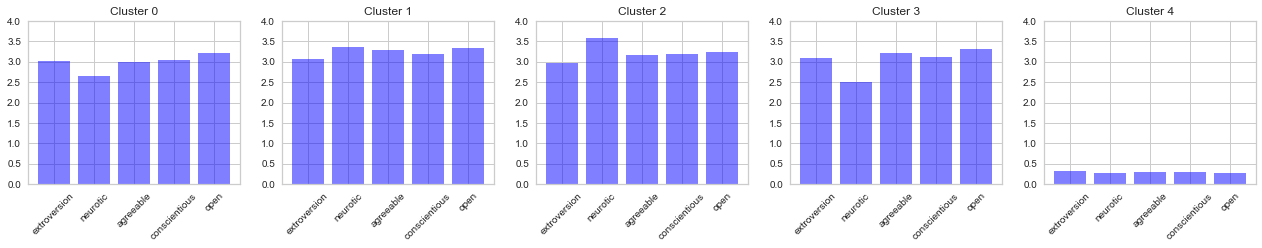

In [88]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
display(dataclusters)
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
#     plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.bar(dataclusters.columns, dataclusters.iloc[i, :], color='blue', alpha=0.5)
#     plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
#     plt.title(str(dataclusters.columns[i]))
    plt.xticks(rotation=45)
#     plt.xlim(0,5)
    plt.ylim(0,4)
    

In [85]:
# dataclusters.index
# dataclusters.iloc[1, :]

In [25]:
# Visualizing the Cluster Predictions

# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(data)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

PCA1      PCA2  Clusters
0  1.619993 -0.730197         3
1 -1.448729 -0.285385         0
2 -1.428897 -0.470595         0
3 -1.566618 -0.181315         0
4  1.660541 -0.540705         3

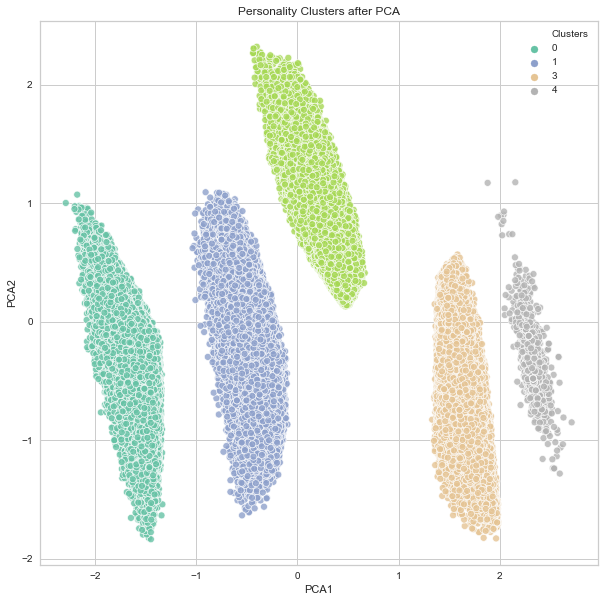

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [27]:
df_pc = df.iloc[:,:-1]
df_pc = df_pc.fillna(0)

In [28]:
# Visualizing the Cluster Predictions

# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_pc)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

PCA1      PCA2  Clusters
0 -5.436824 -1.369654         3
1  0.234843  2.843959         0
2 -0.642529  2.087199         0
3  1.109097  0.524883         0
4 -4.684121  1.832406         3

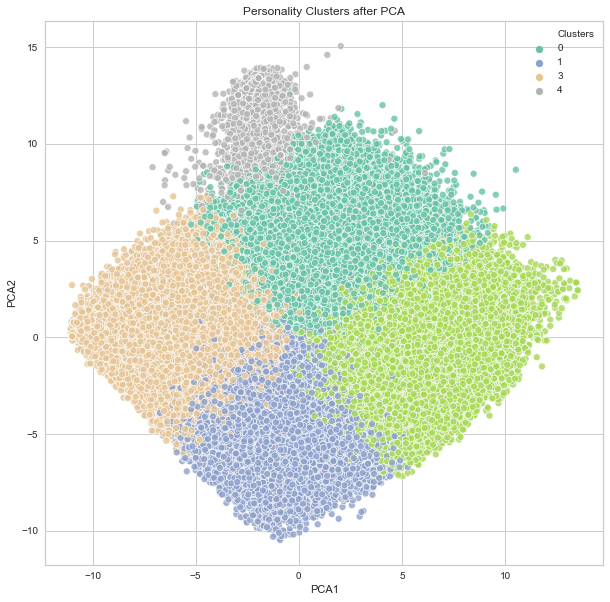

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [35]:
# Implementing the Model to See My Personality

import random

columns = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

val1 = [random.randint(1,4) for ind in range(10)]
val2 = [random.randint(1,3) for ind in range(10)]
val3 = [random.randint(1,4) for ind in range(10)]
val4 = [random.randint(1,4) for ind in range(10)]
val5 = [random.randint(1,3) for ind in range(10)]
val = val1+val2+val3+val4+val5
len(val)


50

In [37]:
# my_data = [val]
my_data = pd.DataFrame(data=[val], columns=columns)
my_data

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN1  \
0     2     4     4     1     3     1     4     4     1      1  ...     3   

   OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0     3     2     2     1     3     2     2     3      3  

[1 rows x 50 columns]

In [38]:
my_data1 = scaler.transform(my_data)
my_data1

array([[0.4, 0.8, 0.8, 0.2, 0.6, 0.2, 0.8, 0.8, 0.2, 0.2, 0.6, 0.4, 0.4,
        0.6, 0.4, 0.6, 0.6, 0.6, 0.4, 0.2, 0.8, 0.6, 0.4, 0.4, 0.8, 0.6,
        0.8, 0.4, 0.2, 0.6, 0.8, 0.8, 0.6, 0.8, 0.2, 0.4, 0.4, 0.8, 0.6,
        0.2, 0.6, 0.6, 0.4, 0.4, 0.2, 0.6, 0.4, 0.4, 0.6, 0.6]])

In [39]:
my_personality = k_fit.predict(my_data1)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [0]


In [45]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


extroversion  neurotic  agreeable  conscientious  open  cluster
0           2.5       2.4        2.8            2.8   2.4        0

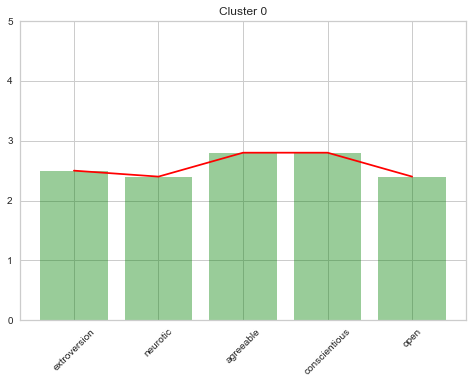

In [46]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.4)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title('Cluster '+str(my_sums['cluster'][0]))
plt.xticks(rotation=45)
plt.ylim(0,5);
# plt.ylim(0,50);

In [47]:
# 'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 
# 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 
# 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 
# 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 
# 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'


In [ ]:
# one_scores= {}

# one_scores['extroversion_score']= my_data[ext][0]- my_data[ext][1]+ my_data[ext][2]- my_data[ext][3]+ my_data[ext][4]- my_data[ext][5]+ my_data[ext][6]- my_data[ext][7]+ my_data[ext][8]- my_data[ext][9]
# one_scores['neuroticism_score']= my_data[est][0]- my_data[est][1]+ my_data[est][2]- my_data[est][3]+ my_data[est][4]+ my_data[est][5]+ my_data[est][6]+ my_data[est][7]+ my_data[est][8]+ my_data[est][9]
# one_scores['agreeableness_score']= -my_data[agr][0]+ my_data[agr][1]- my_data[agr][2]+ my_data[agr][3]- my_data[agr][4]- my_data[agr][5]+ my_data[agr][6]- my_data[agr][7]+ my_data[agr][8]+ my_data[agr][9]
# one_scores['conscientiousness_score']= my_data[csn][0]- my_data[csn][1]+ my_data[csn][2]- my_data[csn][3]+ my_data[csn][4]- my_data[csn][5]+ my_data[csn][6]- my_data[csn][7]+ my_data[csn][8]+ my_data[csn][9]
# one_scores['openness_score']= my_data[opn][0]- my_data[opn][1]+ my_data[opn][2]- my_data[opn][3]+ my_data[opn][4]- my_data[opn][5]+ my_data[opn][6]+ my_data[opn][7]+ my_data[opn][8]+ my_data[opn][9]

# one_scores

In [48]:
# list(my_data.loc[0])[0:10]
# my_data.iloc[:,0:10]

# Summing up the different questions groups
col_list = list(my_data.loc[0])
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [49]:
ext,est,agr,csn,opn

([2, 4, 4, 1, 3, 1, 4, 4, 1, 1],
 [3, 2, 2, 3, 2, 3, 3, 3, 2, 1],
 [4, 3, 2, 2, 4, 3, 4, 2, 1, 3],
 [4, 4, 3, 4, 1, 2, 2, 4, 3, 1],
 [3, 3, 2, 2, 1, 3, 2, 2, 3, 3])

In [50]:
one_scores= {}

one_scores['extroversion_score']= ext[0]- ext[1]+ ext[2]- ext[3]+ ext[4]- ext[5]+ ext[6]- ext[7]+ ext[8]- ext[9]
one_scores['neuroticism_score']= est[0]- est[1]+ est[2]- est[3]+ est[4]+ est[5]+ est[6]+ est[7]+ est[8]+ est[9]
one_scores['agreeableness_score']= -agr[0]+ agr[1]- agr[2]+ agr[3]- agr[4]- agr[5]+ agr[6]- agr[7]+ agr[8]+ agr[9]
one_scores['conscientiousness_score']= csn[0]- csn[1]+ csn[2]- csn[3]+ csn[4]- csn[5]+ csn[6]- csn[7]+ csn[8]+ csn[9]
one_scores['openness_score']= opn[0]- opn[1]+ opn[2]- opn[3]+ opn[4]- opn[5]+ opn[6]+ opn[7]+ opn[8]+ opn[9]

one_scores

{'extroversion_score': 3,
 'neuroticism_score': 14,
 'agreeableness_score': -2,
 'conscientiousness_score': 0,
 'openness_score': 8}

In [51]:
one_scores= {}

one_scores['extroversion_score']= str((ext[0]- ext[1]+ ext[2]- ext[3]+ ext[4]- ext[5]+ ext[6]- ext[7]+ ext[8]- ext[9])/10)
one_scores['neuroticism_score']= str((est[0]- est[1]+ est[2]- est[3]+ est[4]+ est[5]+ est[6]+ est[7]+ est[8]+ est[9])/10)
one_scores['agreeableness_score']= str((-agr[0]+ agr[1]- agr[2]+ agr[3]- agr[4]- agr[5]+ agr[6]- agr[7]+ agr[8]+ agr[9])/10)
one_scores['conscientiousness_score']= str((csn[0]- csn[1]+ csn[2]- csn[3]+ csn[4]- csn[5]+ csn[6]- csn[7]+ csn[8]+ csn[9])/10)
one_scores['openness_score']= str((opn[0]- opn[1]+ opn[2]- opn[3]+ opn[4]- opn[5]+ opn[6]+ opn[7]+ opn[8]+ opn[9])/10)

one_scores

{'extroversion_score': '0.3',
 'neuroticism_score': '1.4',
 'agreeableness_score': '-0.2',
 'conscientiousness_score': '0.0',
 'openness_score': '0.8'}

In [ ]:
# NOTES:
    
# https://www.kaggle.com/jagannathrk/resume-classification/notebook
# https://www.kaggle.com/dhainjeamita/resumedataset
# https://www.kaggle.com/jagannathrk/resume-classification
# https://www.kaggle.com/dhainjeamita/resume-classification
# https://www.kaggle.com/abdoragab/resume-classification
    

# Resume Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
resumeDataSet = pd.read_csv('dataset/UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

  cleaned_resume  
0                 
1                 
2                 
3                 
4

In [3]:
resumeDataSet2 = pd.read_csv('dataset/resume_dataset.csv' ,encoding='utf-8')
resumeDataSet2['cleaned_resume'] = ''
resumeDataSet2.head()

Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

  cleaned_resume  
0                 
1                 
2                 
3                 
4

In [4]:
len(resumeDataSet), len(resumeDataSet2)

(962, 169)

In [5]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [6]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
Sales                        40
ETL Developer                40
Data Science                 40
Operations Manager           40
Blockchain                   40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


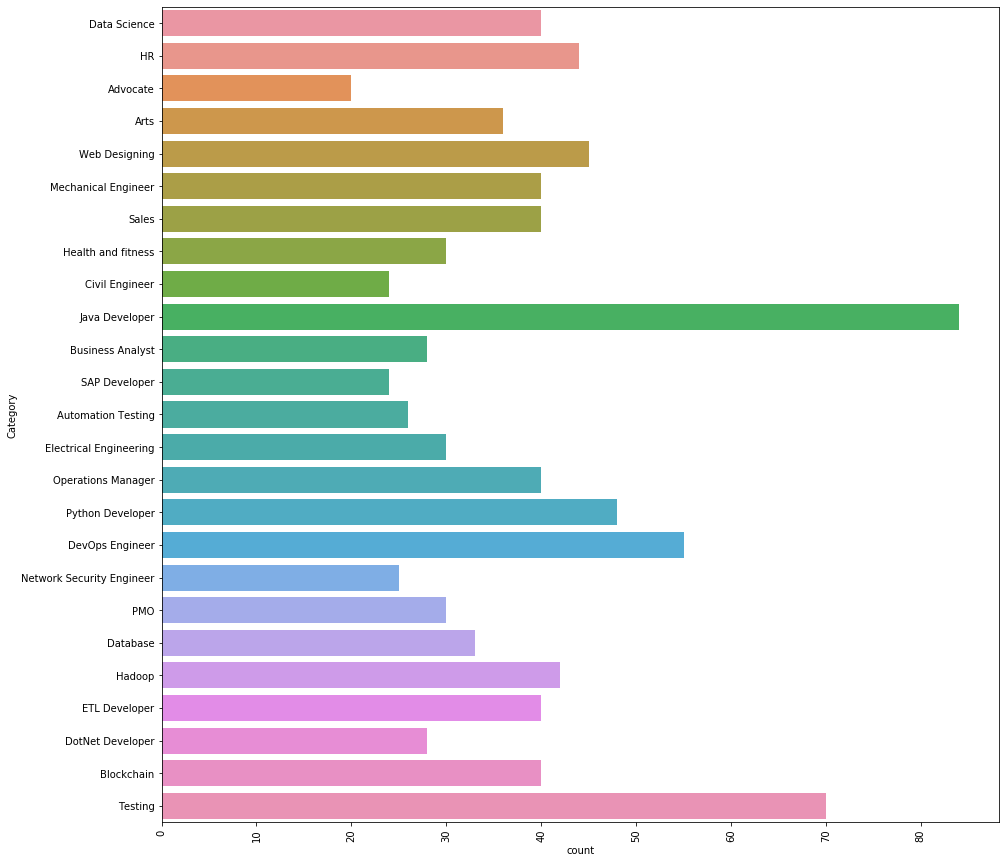

In [7]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

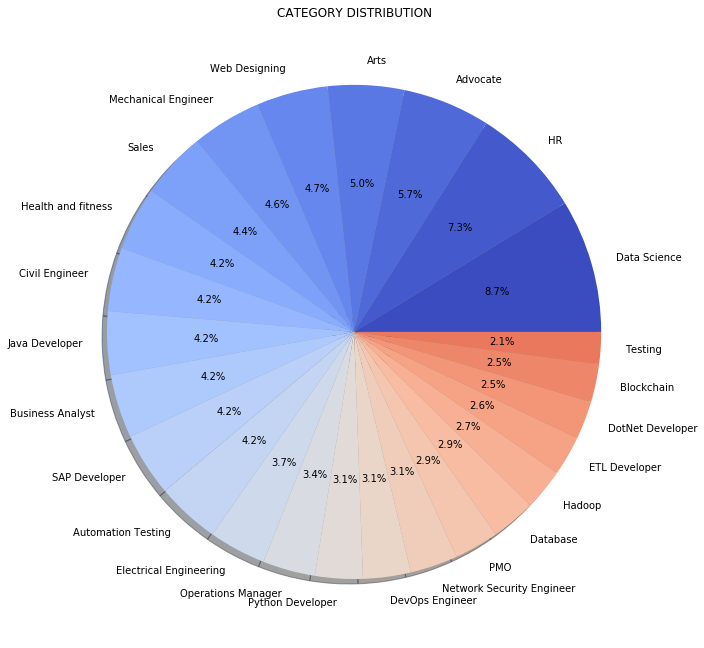

In [8]:
# from matplotlib.gridspec import GridSpec
# targetCounts = resumeDataSet['Category'].value_counts()
# targetLabels  = resumeDataSet['Category'].unique()
# # Make square figures and axes
# plt.figure(1, figsize=(25,25))
# the_grid = GridSpec(2, 2)


# cmap = plt.get_cmap('coolwarm')
# colors = [cmap(i) for i in np.linspace(0, 1, 30)]
# plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

# source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
# plt.show()

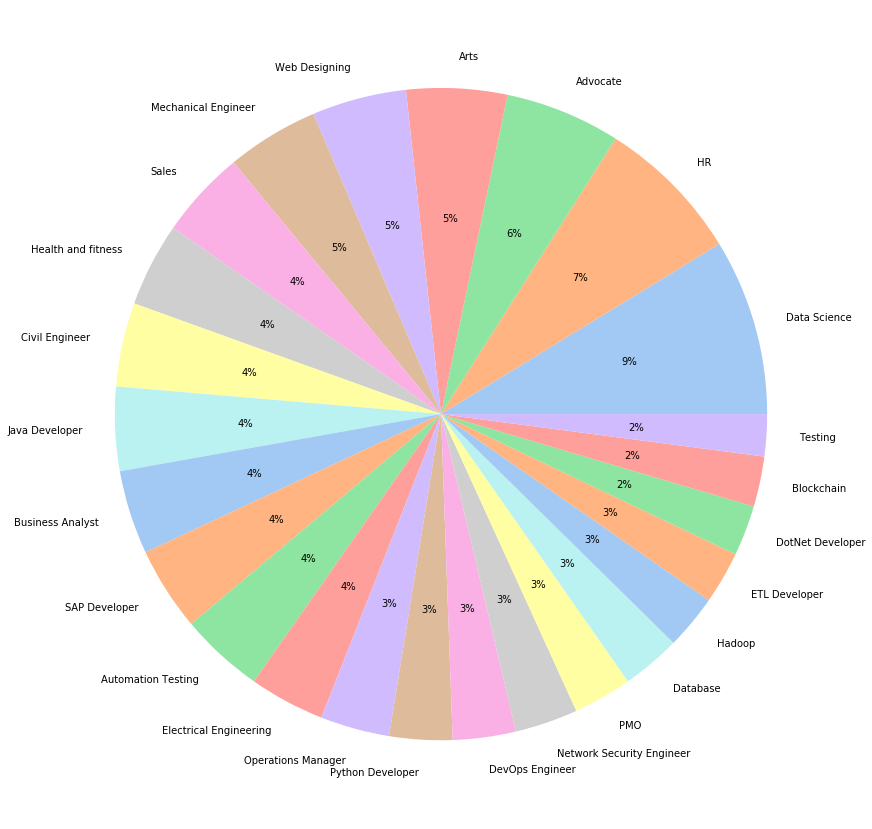

In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# #define Seaborn color palette to use
# colors = sns.color_palette('pastel')[0:300]
# data = resumeDataSet['Category'].value_counts() #resumeDataSet['Category']
# labels = resumeDataSet['Category'].unique()

# # Make square figures and axes
# plt.figure(1, figsize=(15,15))

# #create pie chart
# plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
# plt.show()

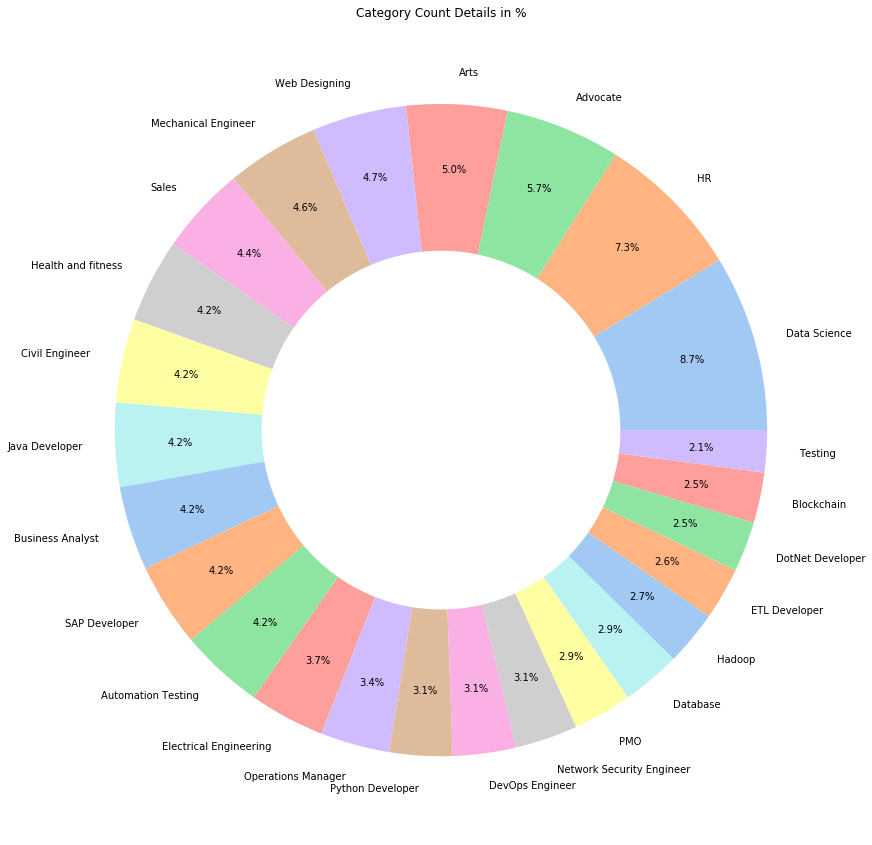

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:30]
data = resumeDataSet['Category'].value_counts() #resumeDataSet['Category']
labels = resumeDataSet['Category'].unique()

# Make square figures and axes
plt.figure(1, figsize=(15,15))

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%', pctdistance=0.8)

# draw circle
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Category Count Details in %')

plt.show()

In [11]:
# to eliminate regular expression

import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [12]:
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
print (resumeDataSet['cleaned_resume'][0])

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the r

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\munge\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\munge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentences : 
 Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Se

wc :  <wordcloud.wordcloud.WordCloud object at 0x000002855F2575F8> 



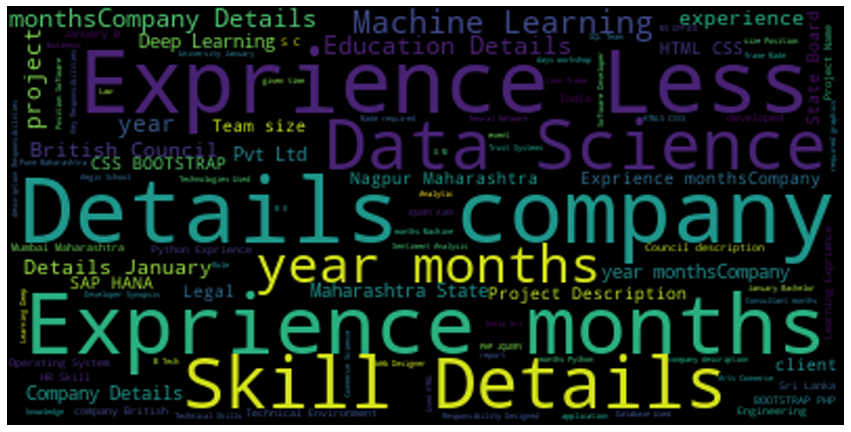

In [13]:
# !pip install nltk
# !pip install wordcloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
print('Sentences : \n',Sentences[0],'\n')
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print('mostcommon : ', mostcommon,'\n')
print('cleanedSentences : ', cleanedSentences,'\n')

wc = WordCloud().generate(cleanedSentences)
print('wc : ', wc,'\n')

plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='spline16') # bilinear
# 'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 
# 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 
# 'mitchell', 'sinc', 'lanczos', 'blackman'
plt.axis("off")
plt.show()

In [ ]:
# https://www.kaggle.com/jagannathrk/resume-classification/notebook
# https://www.kaggle.com/mohamedabdelghani/baseline-modeling


In [14]:
# Transform target variable using label encoding

from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")
print('resumeDataSet : ')
resumeDataSet

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS
resumeDataSet : 


Category                                             Resume  \
0           6  Skills * Programming Languages: Python (pandas...   
1           6  Education Details \r\nMay 2013 to May 2017 B.E...   
2           6  Areas of Interest Deep Learning, Control Syste...   
3           6  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4           6  Education Details \r\n MCA   YMCAUST,  Faridab...   
..        ...                                                ...   
957        23  Computer Skills: â¢ Proficient in MS office (...   
958        23  â Willingness to accept the challenges. â ...   
959        23  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...   
960        23  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...   
961        23  Skill Set OS Windows XP/7/8/8.1/10 Database MY...   

                                        cleaned_resume  
0    Skills Programming Languages Python pandas num...  
1    Education Details May 2013 to May 2017 B E UIT...  
2    Areas of Interest Deep Learning Control System...  
3    Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4    Education Details MCA YMCAUST Faridabad Haryan...  
..                                                 ...  
957  Computer Skills Proficient in MS office Word B...  
958   Willingness to a ept the challenges Positive ...  
959  PERSONAL SKILLS Quick learner Eagerness to lea...  
960  COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...  
961  Skill Set OS Windows XP 7 8 8 1 10 Database MY...  

[962 rows x 3 columns]

In [15]:
# Text representation using TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values
print('requiredText : ',requiredText,'\n')
print('requiredTarget : ',requiredTarget,'\n')

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)
print('WordFeatures : ',WordFeatures,'\n')

print ("Feature completed .....")


requiredText :  ['Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in

WordFeatures :    (0, 1497)	0.030442872257393377
  (0, 1484)	0.034531750632907525
  (0, 1482)	0.1138465211736939
  (0, 1460)	0.07093131129419672
  (0, 1451)	0.033309013428457386
  (0, 1442)	0.03203670321153616
  (0, 1440)	0.08546898208818157
  (0, 1439)	0.04080461724681855
  (0, 1436)	0.05680440806960008
  (0, 1420)	0.04659756799177676
  (0, 1419)	0.0503923714674369
  (0, 1389)	0.08368776039571268
  (0, 1388)	0.11957568503304351
  (0, 1382)	0.0636917041233275
  (0, 1376)	0.1487996917738002
  (0, 1371)	0.06899078914578757
  (0, 1365)	0.0531162184530022
  (0, 1364)	0.0815286030249583
  (0, 1362)	0.05813765391929385
  (0, 1358)	0.025538351209887553
  (0, 1344)	0.1499576218829958
  (0, 1343)	0.05681550781284476
  (0, 1309)	0.0646209141904646
  (0, 1299)	0.05319383005661842
  (0, 1286)	0.0346379947929267
  :	:
  (961, 336)	0.13437601229264157
  (961, 317)	0.06693311287776045
  (961, 315)	0.08639977563211801
  (961, 272)	0.025466251941105137
  (961, 258)	0.082314549875185
  (961, 243)	0.1085

In [ ]:
# Split the date

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2,stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)


In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
#print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

In [ ]:
mnb_clf = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
mnb_clf_prediction = mnb_clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(mnb_clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(mnb_clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (mnb_clf, metrics.classification_report(y_test, mnb_clf_prediction)))

In [ ]:
# !pip install xgboost
from xgboost import XGBClassifier,plot_importance
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()  
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
# predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(xgb.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(xgb.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (xgb, metrics.classification_report(y_test, y_pred)))
#print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

In [ ]:
# Using our CVs to test the model

Test_CVs = pd.read_csv('dataset/resume_dataset.csv' ,encoding='utf-8')
Test_CVs

In [ ]:
Test_CVs['cleaned_resume'] = ''
Test_CVs['cleaned_resume']= Test_CVs.Resume.apply(lambda x: cleanResume(x))
Test_CVs

In [ ]:
print (Test_CVs['cleaned_resume'][0],'\n', len(Test_CVs['cleaned_resume'][0]))

In [ ]:
test_text = Test_CVs['cleaned_resume'].values

# word_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     stop_words='english',
#     max_features=1500)
# word_vectorizer.fit(test_text)

WordFeatures = word_vectorizer.transform(test_text)
print('WordFeatures : ', WordFeatures)

In [ ]:
WordFeatures.shape

In [ ]:
X_test2=WordFeatures

In [ ]:
y_pred2 = xgb.predict(X_test2)

In [ ]:
y_pred2

In [ ]:
prediction= le.inverse_transform(y_pred2)

In [ ]:
prediction

In [ ]:
test_resume = '''
Mohamed Abdelghani Mohamed Mobile 20 0101 024 336 5 mohamedabdelghani1511 Objective Strong analytical thinker with high 
problem solving and communication skills Seeking an opportunity in data science and machine learning field to utilize my 
data science skills to transform data into business value Education 9 month Diploma Information Technology Institute Smart 
Village Oct 2020 Present Track Date Science Intake 41 Graduation Project Resume Ranking using NLP for a multinational 
telecommunication company Bachelor of Engineering Ain Shams University Year of graduation 2017 Department Electrical 
Engineering Grade Very Good Work Experience Senior technical support engineer at Orange Business Services Sep 2018 Dec 
2020 Providing a professional technical point of contact for customers for different services including L3 VPN solution 
VPN remote access Z scalar proxy Skype for business Acting as an escalation manager for chronic and complex problems and 
incidents Awarded many local awards for performance excellence Acting as a shift leader and conduct trainings to the new 
comers Intern Orange Business Services got introduced to Orange Support functions August 2017 Intern Schneider Electric 
got introduced to Schneider products and services July 2016 Intern ABB got assigned to the tendering department August 
2015 Skills Technical Skills Concepts Machine Learning Cloud computing Fundamentals Business Statistics Data warehouse 
fundamentals and Data modeling Deep learning Agile Methodologies Visualization and story telling Big Data fundamentals 
Optimization and Simulation methods Modeling and Operations research OOP Systems Thinking Tools Programming Languages 
Python R SAS Bash Java Database SQL Oracle PL SQL Analytical SQL Tools Excel Hadoop Spark Linux Languages Skills Fluent in 
spoken and written English Arabic as a native speaker Very good command of written and spoken French Extracurricular 
Activities Business Development Moderator ACES Aug 2016 Jun 2017 Prepared and conducted 30 hrs Business development 
workshop Participant in Exxon Mobil case study MECA Academy Sep 2016 Jun 2017 Awarded special mention perseverance in 
difficult circumstances from Exxon Mobil Academic committee member Pirates Egypt Aug 2014 Jun 2015 Prepared and conducted 
30 hrs CCNA workshop Projects Recommender system using XGBoost for Airbnb use case Energy consumption prediction using 
LightGBM Movie rating prediction using Random Forest Analyzing ticketing system performance using R Certificates Machine 
learning course offered by Stanford University Coursera Feb 2021 ITILV3 Dec 2019 Six Sigma Yellow Belt July 2019
'''

In [ ]:
test_text = [test_resume] # Test_CVs['cleaned_resume'].values

# word_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     stop_words='english',
#     max_features=1500)
# word_vectorizer.fit(test_text)

WordFeatures = word_vectorizer.transform(test_text)
print('WordFeatures : ', WordFeatures)

In [ ]:
WordFeatures.shape

In [ ]:
X_test2=WordFeatures
y_pred2 = xgb.predict(X_test2)

In [ ]:
y_pred2 

In [ ]:
prediction= le.inverse_transform(y_pred2)
prediction